In [483]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

In [484]:
path = "/Users/stephanielin/Desktop/edm_cup_2023/"

In [525]:
def load_data(filenames):
    dataframes = {}
    for name, file in filenames.items():
        dataframes[name] = pd.read_csv(file)
    return dataframes

def print_shape(dataframes):
    for df_name, df in dataframes.items():
        print(f"{df_name} shape: {df.shape}")
        
def unique_values(dataframes):
    for df_name, df in dataframes.items():
        print(f"\n{df_name} unique values:")
        for col in df.select_dtypes(include='object').columns:
            print(f"{col}: {len(df[col].unique())} unique values")
        
def check_missing_values(dataframes):
    for df_name, df in dataframes.items():
        print(f"\n{df_name} missing values:")
        print(df.isnull().sum())
        
def display_head(dataframes):
    for df_name, df in dataframes.items():
        print(f"\n{df_name} head:")
        display(df.head())

In [526]:
filenames = {
    "action_logs": path + "action_logs.csv",
    "assignment_details": path + "assignment_details.csv",
    "assignment_relationships": path + "assignment_relationships.csv",
    "evaluation_unit_test_scores": path + "evaluation_unit_test_scores.csv",
    "explanation_details": path + "explanation_details.csv",
    "hint_details": path + "hint_details.csv",
    "problem_details": path + "problem_details.csv",
    "sequence_details": path + "sequence_details.csv",
    "sequence_relationships": path + "sequence_relationships.csv",
    "training_unit_test_scores": path + "training_unit_test_scores.csv",
}

dataframes = load_data(filenames)

In [487]:
print_shape(dataframes)

action_logs shape: (23932276, 10)
assignment_details shape: (9319676, 9)
assignment_relationships shape: (702887, 2)
evaluation_unit_test_scores shape: (124455, 4)
explanation_details shape: (4132, 6)
hint_details shape: (8381, 7)
problem_details shape: (132738, 10)
sequence_details shape: (10774, 8)
sequence_relationships shape: (13108, 2)
training_unit_test_scores shape: (452439, 3)


In [488]:
check_missing_values(dataframes)


action_logs missing values:
assignment_log_id                   0
timestamp                           0
problem_id                    6136715
max_attempts                 18686416
available_core_tutoring      18686416
score_viewable               18686416
continuous_score_viewable    18686416
action                              0
hint_id                      23858933
explanation_id               23911140
dtype: int64

assignment_details missing values:
assignment_log_id                0
teacher_id                       0
class_id                         0
student_id                       0
sequence_id                      0
assignment_release_date          0
assignment_due_date        2744279
assignment_start_time            0
assignment_end_time        1878016
dtype: int64

assignment_relationships missing values:
unit_test_assignment_log_id    0
in_unit_assignment_log_id      0
dtype: int64

evaluation_unit_test_scores missing values:
id                        0
assignment_log_id   

In [489]:
unique_values(dataframes)


action_logs unique values:
assignment_log_id: 638528 unique values
problem_id: 57361 unique values
available_core_tutoring: 5 unique values
action: 14 unique values
hint_id: 9126 unique values
explanation_id: 4133 unique values

assignment_details unique values:
assignment_log_id: 9319676 unique values
teacher_id: 23523 unique values
class_id: 47401 unique values
student_id: 651253 unique values
sequence_id: 8774 unique values
assignment_start_time: 9262758 unique values
assignment_end_time: 7386234 unique values

assignment_relationships unique values:
unit_test_assignment_log_id: 56577 unique values
in_unit_assignment_log_id: 638528 unique values

evaluation_unit_test_scores unique values:
assignment_log_id: 11272 unique values
problem_id: 1471 unique values

explanation_details unique values:
explanation_id: 4132 unique values
explanation_creator_id: 14 unique values
explanation_text_bert_pca: 2367 unique values

hint_details unique values:
hint_id: 8381 unique values
hint_creator_

In [ ]:
########################################## Data Clearning ##########################################

In [527]:
tuts = dataframes["training_unit_test_scores"]
euts = dataframes["evaluation_unit_test_scores"]
ar = dataframes["assignment_relationships"]
al = dataframes["action_logs"]
ad = dataframes["assignment_details"]
problemd = dataframes["problem_details"]
ed = dataframes["explanation_details"]
hd = dataframes["hint_details"]
sd = dataframes["sequence_details"]
sr = dataframes["sequence_relationships"]

In [518]:
# assignment_detail.csv

In [529]:
# assignment_end_time null value indicates removal for predicted question or student not finish
# assignment_due_date: If a teacher did not specify a due date, this column will be blank.
ad['assignment_due_date'] = ad['assignment_due_date'].fillna('NA')

In [520]:
# problem_details.csv
# This file contains one row for every problem referenced in the dataset, 
# except for some problems in the action logs, which have been deleted from the database. 
# These problems likely had errors during their original transcription into ASSISTments that were corrected,
# but no record of the original problems was kept.

In [530]:
problemd['problem_skill_code'] = problemd['problem_skill_code'].fillna('NA')
problemd['problem_contains_image'] = problemd['problem_contains_image'].fillna(0)
problemd['problem_contains_equation'] = problemd['problem_contains_equation'].fillna(0)
problemd['problem_contains_video'] = problemd['problem_contains_video'].fillna(0)
problemd['problem_skill_description'] = problemd['problem_skill_description'].fillna('NA')

In [522]:
# sequence_details
# This file contains at least one row for each sequence present in the dataset and contains all the information unique to each sequence. 
# Some sequences have duplicate rows because they are present in multiple locations within units. Whether that is intentional is unclear.

In [531]:
# sequence_folder_path_level_4 & sequence_folder_path_level_5: If there is no folder at this path depth, this column is blank.
sd['sequence_folder_path_level_4'] = sd['sequence_folder_path_level_4'].fillna('NA')
sd['sequence_folder_path_level_5'] = sd['sequence_folder_path_level_5'].fillna('NA')

In [513]:
########################################## Explorative Analysis ##########################################

In [514]:
# data viz
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

In [ ]:
# explore problem related variables

In [495]:
problem_df = tuts.merge(problemd, how="left", left_on="problem_id", right_on='problem_id')

In [496]:
problem_df.head()

,assignment_log_id,problem_id,score,problem_multipart_id,problem_multipart_position,problem_type,problem_skill_code,problem_skill_description,problem_contains_image,problem_contains_equation,problem_contains_video,problem_text_bert_pca
0,1CEASUAUQJ,18J6436AS5,1,XRYU3RSCT,5.0,Number,5.NF.B.3,Word Problems with Fraction as Division,0.0,1.0,0.0,"[-1.44214899,-3.56075855,0.61502198,2.97566280..."
1,2IMKPEIL2Q,9RMI4CZU9,0,LRHNAAAOA,1.0,Number,5.NBT.B.7-4,Divide Decimals,0.0,0.0,0.0,"[0.15730453,0.45389100,2.72398309,-2.27659596,..."
2,2IMKPEIL2Q,8F4U5WWTV,0,KJOS83C7V,6.0,Check All That Apply,5.NF.B.6,Multiplying Fractions - Word Problems,0.0,0.0,0.0,"[-5.74318382,5.40825199,3.18891927,-1.34030558..."
3,2IMKPEIL2Q,27D3I359NE,1,WLUAZXVGD,1.0,Number,5.NF.B.4a-1,Multiplying Fractions,0.0,1.0,0.0,"[-2.75417649,2.83185562,1.73471215,-4.30648639..."
4,2IMKPEIL2Q,22DY4PFVMV,1,SUWYLUKBC,1.0,Number,5.NBT.B.7-3,Multiplying Decimals Using Standard Algorithm,0.0,0.0,0.0,"[1.75571481,-1.35640711,2.17958424,-2.89144286..."


In [497]:
# continuous variables
problem_df.corr()

,score,problem_multipart_position,problem_contains_image,problem_contains_equation,problem_contains_video
score,1.000000,0.054939,-0.037051,-0.029338,NaN
problem_multipart_position,0.054939,1.000000,-0.159719,-0.151146,NaN
problem_contains_image,-0.037051,-0.159719,1.000000,-0.081448,NaN
problem_contains_equation,-0.029338,-0.151146,-0.081448,1.000000,NaN
problem_contains_video,NaN,NaN,NaN,NaN,NaN


In [498]:
# categorical variables only problem types: problem_skill_code (too many unique values), problem_skill_description(too many unique values)

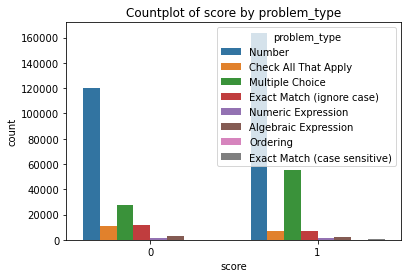

In [499]:
sns.countplot(x='score', hue='problem_type', data=problem_df)
plt.title('Countplot of score by problem_type')
plt.show()

In [ ]:
########################################## Feature Engineer ##########################################

In [533]:

# too many unique values for problem_skill_code

# If a skill code has a dash in it, that specifies a more detailed sub-skill beyond what the common core provides.
problemd['sub_skill_involved'] = problemd['problem_skill_code'].str.contains('-').astype(int)

# create dummy variables for problem_type
problem_type = pd.get_dummies(problemd['problem_type'], drop_first=True)
problemd.drop('problem_type', axis = 1, inplace=True)
problemd = pd.concat([problemd, problem_type], axis=1)
problem_type_columns = problemd.iloc[:, -9:].columns.tolist()
problem_type_columns.append('problem_id')
problemd.head(10)

,problem_id,problem_multipart_id,problem_multipart_position,problem_skill_code,problem_skill_description,problem_contains_image,problem_contains_equation,problem_contains_video,problem_text_bert_pca,sub_skill_involved,Check All That Apply,Exact Fraction,Exact Match (case sensitive),Exact Match (ignore case),Multiple Choice,Number,Numeric Expression,Ordering,Ungraded Open Response
0,10MFND3HAJ,2MHCTW1IIN,1,6.RP.A.3b,Unit Rate,0.0,0.0,1.0,"[0.53955209,-0.96322744,0.49725574,6.28795392,...",0,0,0,0,0,1,0,0,0,0
1,IH3MOE7AF,1UEQMXOOFA,1,6.RP.A.3b,Unit Rate,0.0,0.0,0.0,"[-1.61147666,-1.50911536,0.52055446,6.01118343...",0,0,0,0,0,1,0,0,0,0
2,14YC7CEE2N,1UEQMXOOFA,2,6.RP.A.3b,Unit Rate,0.0,0.0,0.0,"[-8.95361845,5.26005410,-4.41350451,-2.6751771...",0,0,0,0,0,0,0,0,0,1
3,16L5KQWLN7,1W7DRPNEJL,1,6.RP.A.3b,Unit Rate,0.0,0.0,0.0,"[-2.89295465,1.73222701,-0.21075635,0.16314057...",0,0,0,0,0,0,0,0,0,1
4,BU0LO0LDD,1Z6MGLD8VK,1,6.RP.A.3b,Unit Rate,0.0,0.0,0.0,"[-1.53959700,1.35386494,-1.56874727,0.89545312...",0,0,0,0,0,0,0,0,0,1
5,W9WPQSAU5,MBYKGWG5L,1,6.RP.A.3b,Unit Rate,0.0,0.0,0.0,"[-3.20997122,0.64484637,-0.57017812,-0.4925776...",0,0,0,0,0,0,0,0,0,1
6,2OHCH5C5BD,O0EI8SMXR,1,6.RP.A.2,Expressing Unit Rate in Words,0.0,0.0,0.0,"[-1.47761510,-1.33452493,-0.32730713,0.4147120...",0,0,0,0,0,0,1,0,0,0
7,9CB1OILA2,A1DWWVVLC,1,6.RP.A.3a,Making Equivalent Ratio Tables,0.0,0.0,0.0,"[-3.49009235,-4.33279096,1.77473598,-0.3124369...",0,0,0,0,0,0,0,0,0,1
8,1JCPX2ZOXQ,K65VD17P2,1,6.RP.A.3a,Making Equivalent Ratio Tables,0.0,0.0,0.0,"[-1.43699869,-4.19686441,-0.77936048,4.2911283...",0,0,0,0,0,0,0,0,0,1
9,AANYMYPL6,1K9KSMZ0FV,1,6.RP.A.2,Expressing Unit Rate in Words,0.0,0.0,0.0,"[-1.70709674,-2.89674901,-0.17309755,5.5549082...",0,0,0,0,0,1,0,0,0,0


In [534]:
# If the student never completed the assignment, this assignment_end_time will be blank.
# create a notfinish column to indicate whether the assignment is finsihed or not
ad["notfinish"] = ad['assignment_end_time'].isnull().astype(int)

In [535]:
# get the sum of unfinished in unit assignments for each unit test assignment
ad_ar = ar.merge(ad, how='left', left_on='in_unit_assignment_log_id', right_on='assignment_log_id')
ad_ar.head()

,unit_test_assignment_log_id,in_unit_assignment_log_id,assignment_log_id,teacher_id,class_id,student_id,sequence_id,assignment_release_date,assignment_due_date,assignment_start_time,assignment_end_time,notfinish
0,7FGC8P0F1,V6YXT3UG,V6YXT3UG,2RJQW98OWW,RXSM32DEO,1U9ZF969S0,2JJ7KO37DN,1.598274e+09,1598299200.0,1598276775.745,NaN,1
1,15KQFID5U5,1TFFYMT814,1TFFYMT814,2RJQW98OWW,RXSM32DEO,WSE1HQ50K,2JJ7KO37DN,1.598274e+09,1598299200.0,1598276723.893,NaN,1
2,QKDRPCXSG,1N2IFGUASM,1N2IFGUASM,2RJQW98OWW,RXSM32DEO,1WAY800WX8,2JJ7KO37DN,1.598274e+09,1598299200.0,1598276817.359,NaN,1
3,1JOJIQXU1B,15W4ET3W62,15W4ET3W62,2RJQW98OWW,RXSM32DEO,2F7JJR04ZX,2JJ7KO37DN,1.598274e+09,1598299200.0,1598276781.304,NaN,1
4,2C9YZRVZT0,1WORTY787C,1WORTY787C,RYEOA7IGH,1WT4RCXV5J,LN99U8093,2JJ7KO37DN,1.662468e+09,NA,1662490442.77,1663358983.155,0


In [536]:
assignment_total = ad_ar[['unit_test_assignment_log_id', 'in_unit_assignment_log_id']]
assignment_total = assignment_total.groupby('unit_test_assignment_log_id')['in_unit_assignment_log_id'].nunique().rename('Total_Assignment_Count')
assignment_total.to_frame()
assignment_total.head()

unit_test_assignment_log_id
1000ICU8HZ     3
10034AJ3BF     4
1003ISNXYE    48
10043NAGR9    11
1006SE1JT6     6
Name: Total_Assignment_Count, dtype: int64

In [537]:
notfinish = ad_ar[['unit_test_assignment_log_id', 'in_unit_assignment_log_id','notfinish']]
notfinish = notfinish.groupby('unit_test_assignment_log_id').sum()
notfinish.head()

,notfinish
unit_test_assignment_log_id,
1000ICU8HZ,0
10034AJ3BF,2
1003ISNXYE,3
10043NAGR9,0
1006SE1JT6,1


In [538]:
notfinish = notfinish.merge(assignment_total, how = "left", left_index=True, right_index=True)
# add a column to calculate the percent of unfinished in-unit assignments
notfinish['notfinish_percent'] = notfinish['notfinish']/notfinish['Total_Assignment_Count']
notfinish['notfinish_percent'] = notfinish['notfinish_percent'].round(4)
notfinish.head()

,notfinish,Total_Assignment_Count,notfinish_percent
unit_test_assignment_log_id,,,
1000ICU8HZ,0,3,0.0000
10034AJ3BF,2,4,0.5000
1003ISNXYE,3,48,0.0625
10043NAGR9,0,11,0.0000
1006SE1JT6,1,6,0.1667


In [539]:
# Associate the action logs for each in unit assignment with their unit test assignment
al_ar = ar.merge(al, how='left', left_on='in_unit_assignment_log_id', right_on='assignment_log_id')

In [540]:
action_df = al_ar[['unit_test_assignment_log_id', 'action']]
# Get the total number of times each action was taken within the in unit assignments corresponding to each unit test
# assignment
action_df = pd.get_dummies(action_df, columns=['action'])
action_df = action_df.groupby('unit_test_assignment_log_id').sum()
# Create a feature for the total action count, then scale it between 0 and 1
action_count = action_df.sum(axis=1)
# Convert the individual action counts into a fraction of total actions taken
action_df = action_df.div(action_count, axis=0)
# Add the scaled total action count to the dataframe
action_df['action_count'] = (action_count - action_count.min()) / (action_count.max() - action_count.min())

In [541]:
# Associate the tutor for each in unit assignment with their unit test assignment
tutor_df = al_ar[['unit_test_assignment_log_id', 'available_core_tutoring']]
# Get the total number of times each available_core_tutoring was taken within the in unit assignments corresponding to each unit test assignment
tutor_df = pd.get_dummies(tutor_df, columns=['available_core_tutoring'])
tutor_df = tutor_df.groupby('unit_test_assignment_log_id').sum()
# Create a feature for the total tutoring count, then scale it between 0 and 1
tutor_count = tutor_df.sum(axis=1)
# Convert the individual tutor counts into a fraction of total tutorings
tutor_df = tutor_df.div(tutor_count, axis=0)

In [ ]:
########################################## Training Set ##########################################

In [542]:
tuts = dataframes["training_unit_test_scores"]

In [543]:
# Merge action count features with the training unit test scores
tuts = tuts.merge(action_df, how='left', left_on='assignment_log_id', right_index=True)

In [544]:
# Merge problem type, problem skill code, problem type, problem_multipart_position features with the training unit test scores
# selected_cols = ['problem_id', 'problem_skill_code', 'problem_multipart_position' ]
tuts = tuts.merge(problemd[['problem_id', 'sub_skill_involved', 'problem_multipart_position']], how='left', left_on='problem_id', right_on='problem_id')

In [545]:
# merge problem types 
tuts = tuts.merge(problemd[problem_type_columns], how='left', left_on='problem_id', right_on='problem_id')

In [546]:
# Merge available_core_tutoring count features with the training unit test scores
tuts = tuts.merge(tutor_df, how='left', left_on='assignment_log_id', right_index=True)

In [547]:
# merge not_finished percent
tuts = tuts.merge(notfinish['notfinish_percent'], how='left', left_on='assignment_log_id', right_index=True)

In [548]:
tuts.head(10)

,assignment_log_id,problem_id,score,action_answer_requested,action_assignment_finished,action_assignment_resumed,action_assignment_started,action_continue_selected,action_correct_response,action_explanation_requested,...,Multiple Choice,Number,Numeric Expression,Ordering,Ungraded Open Response,available_core_tutoring_answer,available_core_tutoring_explanation,available_core_tutoring_hint,available_core_tutoring_no_tutoring,notfinish_percent
0,1CEASUAUQJ,18J6436AS5,1,0.014487,0.013659,0.001242,0.013659,0.218336,0.170530,0.0,...,0.0,1.0,0.0,0.0,0.0,0.557538,0.0,0.133809,0.308653,0.0
1,2IMKPEIL2Q,9RMI4CZU9,0,0.000000,0.000000,0.000000,0.038462,0.153846,0.153846,0.0,...,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,1.000000,0.000000,1.0
2,2IMKPEIL2Q,8F4U5WWTV,0,0.000000,0.000000,0.000000,0.038462,0.153846,0.153846,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.000000,0.000000,1.0
3,2IMKPEIL2Q,27D3I359NE,1,0.000000,0.000000,0.000000,0.038462,0.153846,0.153846,0.0,...,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,1.000000,0.000000,1.0
4,2IMKPEIL2Q,22DY4PFVMV,1,0.000000,0.000000,0.000000,0.038462,0.153846,0.153846,0.0,...,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,1.000000,0.000000,1.0
5,2IMKPEIL2Q,ZQMHFZJ53,1,0.000000,0.000000,0.000000,0.038462,0.153846,0.153846,0.0,...,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,1.000000,0.000000,1.0
6,2IMKPEIL2Q,1II2JVYEQV,0,0.000000,0.000000,0.000000,0.038462,0.153846,0.153846,0.0,...,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,1.000000,0.000000,1.0
7,2MZN9L748R,2N2SARA9Q6,1,0.005291,0.000000,0.021164,0.089947,0.179894,0.148148,0.0,...,0.0,1.0,0.0,0.0,0.0,0.686275,0.0,0.000000,0.313725,1.0
8,2MZN9L748R,123M9UFYL2,0,0.005291,0.000000,0.021164,0.089947,0.179894,0.148148,0.0,...,0.0,1.0,0.0,0.0,0.0,0.686275,0.0,0.000000,0.313725,1.0
9,2MZN9L748R,1WL078QSL4,0,0.005291,0.000000,0.021164,0.089947,0.179894,0.148148,0.0,...,0.0,1.0,0.0,0.0,0.0,0.686275,0.0,0.000000,0.313725,1.0


In [549]:
tuts = tuts.fillna(0)

In [429]:
########################################## Test Set ##########################################

In [550]:
euts = dataframes["evaluation_unit_test_scores"]

In [551]:
# Merge action count features with the evaluation unit test scores
euts = euts.merge(action_df, how='left', left_on='assignment_log_id', right_index=True)

In [552]:
# Merge problem type, problem skill code, sub_skill_involved, problem_multipart_position features with the evaluation unit test scores
euts = euts.merge(problemd[['problem_id' , 'sub_skill_involved', 'problem_multipart_position']], how='left', left_on='problem_id', right_on='problem_id')

In [553]:
# merge problem type dummies
euts = euts.merge(problemd[problem_type_columns], how='left', left_on='problem_id', right_on='problem_id')

In [554]:
# Merge available_core_tutoring count features with evaluation unit test scores
euts = euts.merge(tutor_df, how='left', left_on='assignment_log_id', right_index=True)

In [555]:
# merge not finished percent
euts = euts.merge(notfinish['notfinish_percent'], how='left', left_on='assignment_log_id', right_index=True)

In [556]:
# euts = euts.merge(attempts['average_attempts'], how='left', left_on='assignment_log_id', right_index=True)

In [557]:
euts.head(10)

,id,assignment_log_id,problem_id,score,action_answer_requested,action_assignment_finished,action_assignment_resumed,action_assignment_started,action_continue_selected,action_correct_response,...,Multiple Choice,Number,Numeric Expression,Ordering,Ungraded Open Response,available_core_tutoring_answer,available_core_tutoring_explanation,available_core_tutoring_hint,available_core_tutoring_no_tutoring,notfinish_percent
0,0,11VO3FPL7U,N9F071P7I,NaN,0.017312,0.011542,0.0,0.011542,0.209398,0.180544,...,0.0,1.0,0.0,0.0,0.0,0.772388,0.0,0.0,0.227612,0.0
1,1,11VO3FPL7U,2EID4DTRNQ,NaN,0.017312,0.011542,0.0,0.011542,0.209398,0.180544,...,0.0,1.0,0.0,0.0,0.0,0.772388,0.0,0.0,0.227612,0.0
2,2,11VO3FPL7U,1PFVQE8WVV,NaN,0.017312,0.011542,0.0,0.011542,0.209398,0.180544,...,0.0,1.0,0.0,0.0,0.0,0.772388,0.0,0.0,0.227612,0.0
3,3,11VO3FPL7U,28ZP6YF22Q,NaN,0.017312,0.011542,0.0,0.011542,0.209398,0.180544,...,0.0,1.0,0.0,0.0,0.0,0.772388,0.0,0.0,0.227612,0.0
4,4,11VO3FPL7U,1H85EY5KJF,NaN,0.017312,0.011542,0.0,0.011542,0.209398,0.180544,...,0.0,1.0,0.0,0.0,0.0,0.772388,0.0,0.0,0.227612,0.0
5,5,11VO3FPL7U,E8O0H8LDG,NaN,0.017312,0.011542,0.0,0.011542,0.209398,0.180544,...,0.0,1.0,0.0,0.0,0.0,0.772388,0.0,0.0,0.227612,0.0
6,6,11VO3FPL7U,C3IYDSLNY,NaN,0.017312,0.011542,0.0,0.011542,0.209398,0.180544,...,0.0,1.0,0.0,0.0,0.0,0.772388,0.0,0.0,0.227612,0.0
7,7,11VO3FPL7U,JXOKSDD1D,NaN,0.017312,0.011542,0.0,0.011542,0.209398,0.180544,...,0.0,1.0,0.0,0.0,0.0,0.772388,0.0,0.0,0.227612,0.0
8,8,11VO3FPL7U,1ZPG07P400,NaN,0.017312,0.011542,0.0,0.011542,0.209398,0.180544,...,0.0,1.0,0.0,0.0,0.0,0.772388,0.0,0.0,0.227612,0.0
9,9,11VO3FPL7U,1WD3ATRTBL,NaN,0.017312,0.011542,0.0,0.011542,0.209398,0.180544,...,0.0,1.0,0.0,0.0,0.0,0.772388,0.0,0.0,0.227612,0.0


In [558]:
euts = euts.fillna(0)

In [ ]:
########################################## Model ##########################################

In [559]:
# Collect the input and target columns for the regression
input_cols = [c for c in tuts.columns]
input_cols.remove('assignment_log_id')
input_cols.remove('problem_id')
input_cols.remove('score')
target_col = 'score'
print(input_cols)

['action_answer_requested', 'action_assignment_finished', 'action_assignment_resumed', 'action_assignment_started', 'action_continue_selected', 'action_correct_response', 'action_explanation_requested', 'action_hint_requested', 'action_live_tutor_requested', 'action_open_response', 'action_problem_finished', 'action_problem_started', 'action_skill_related_video_requested', 'action_wrong_response', 'action_count', 'sub_skill_involved', 'problem_multipart_position', 'Check All That Apply', 'Exact Fraction', 'Exact Match (case sensitive)', 'Exact Match (ignore case)', 'Multiple Choice', 'Number', 'Numeric Expression', 'Ordering', 'Ungraded Open Response', 'available_core_tutoring_answer', 'available_core_tutoring_explanation', 'available_core_tutoring_hint', 'available_core_tutoring_no_tutoring', 'notfinish_percent']


In [561]:
# divide training and testing
X = tuts[input_cols] 
y = tuts['score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Initialize a logistic regression
lr = LogisticRegression(max_iter=1000)
# Fit the regression on all the training data
lr = lr.fit(X_train, y_train)

# y_pred_proba = rf_classifier.predict_proba(X_test)[:, 1]
y_pred_proba =  lr.predict_proba(X_test)[:, 1]

auc = roc_auc_score(y_test, y_pred_proba)
print("AUC:", auc)

AUC: 0.705595186211335


In [ ]:
# For the final prediction, using all tuts to train to predict euts
# Initialize a logistic regression
lr = LogisticRegression(max_iter=1000)
# Fit the regression on all the training data
lr = lr.fit(tuts[input_cols], tuts[target_col])
# Predict the score for each evaluation problem
euts[target_col] = lr.predict_proba(euts[input_cols])[:,1]
euts[['id', 'score']].to_csv('example_submission.csv', index=False)